# Resumen

Se hace uso de las rutinas que figuran en el código `rutAnl160216` que calcula en forma correcta diferencias de potencial y tiempos de las formas de onda recuperadas desde el osciloscopio Tektronix TDS2002B. Adaptación del notebook `pulAnl160224`.

In [1]:
#import matplotlib
import numpy as np
#import matplotlib.pyplot as plt

from rutAnl171221 import * # En rutAnl160216.py residen todas las funciones basadas en las desarroladas en pulAnl160106.ipynb

%matplotlib inline
# coding=utf-8

# refresca de lo importado cada vez que se hace ejecución
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.ticker as tkr # Para exportar gráficas en formato .pgf

In [26]:
# `acq171220z01.npy.npz`
tipo= 'acq'
anne= 17
mes= 12
dia= 20
rango= np.arange(1,3)
prop= 0.2
rechazo= 0.15
tausAMC, areasTotalAMC, areasSubidaAMC, maximosAMC= agregador2(tipo, anne, mes, dia, rango, prop, rechazo)

puntos campana 148
tauAMC= 	8.307e-08 	+/- 5.139e-10 	 s
areaSubidaAMC= 	9.658e-08 	+/- 3.069e-09 	 Vs
areaTotalAMC= 	2.638e-07 	+/- 7.946e-09 	 Vs
maximoAMC=  	1.336e+00 	+/- 4.086e-02 	 V


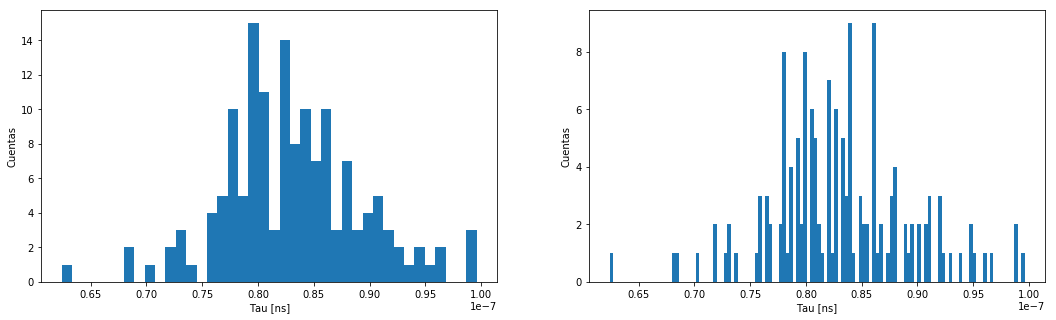

In [30]:
enmascaradaPorSobre= 1
mascara, tausAMCComprimidos = binner(tausAMC, enmascaradaPorSobre)
anchosPulser=1 # compatibilidad pulAnl160224
areasPulser=1 # compatibilidad pulAnl160224
maximosPulser=1  # compatibilidad pulAnl160224
mezclaOptima= todoEnmascarado3(tipo, mascara, anchosPulser, areasPulser, maximosPulser, tausAMCComprimidos, areasTotalAMC, areasSubidaAMC, maximosAMC)

# Problemas

In [5]:
# Quiero leer `acq171220z01.npy.npz`
npzData= np.load('../data/acq171220z01.npy.npz')

In [6]:
FLUC= (-1)* npzData['ch1']
AMC= npzData['ch2']
messungenZahl= AMC.shape
# tiempo
T= npzData['zeit']

conv1= parametrosConversion(npzData)

In [7]:
tipo = 'acq'
i = 1
Meas2= np.array([FLUC[i], AMC[i] ] )
tauAMCi, areaTotalAMCi, areaSubidaAMCi, maxAMCi= tauCeti4(tipo, T, Meas2, messungenZahl, prop, conv1, rechazo)
tauAMCi, areaTotalAMCi, areaSubidaAMCi, maxAMCi

(7.9199999999999968e-08,
 21488.953907815623,
 8450.1883767535037,
 -26.324999999999999)

array([-24.27540107, -75.02406417,   0.84434845,   0.59584888])

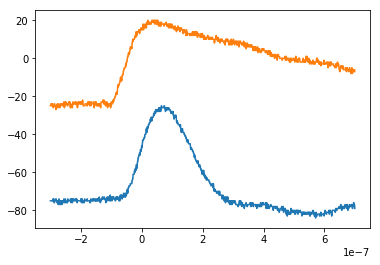

In [8]:
# Ensayo TauCeti4
prop=0.15
bMeas2= baseMeas2(Meas2, messungenZahl, prop) # niveles base
plt.plot(T,AMC[1])
plt.plot(T,FLUC[1])
bMeas2

In [10]:
# Ensayo TauCeti4 (conts)
maxIx= (Meas2[0].argmax(), Meas2[1].argmax() ) # índices máximos ch1, ch2
# máximo promediado cercano
rangoCercano= 20 # tres lecturas a izq y derecha
maxCh1= (Meas2[0][maxIx[0]- rangoCercano: maxIx[0]+ rangoCercano]).mean()
maxCh2= (Meas2[1][maxIx[1]- rangoCercano: maxIx[1]+ rangoCercano]).mean()
maxCh1, maxCh2

(17.925000000000001, -26.324999999999999)

In [25]:
# diferencia máximo- base
deltaV= np.array([maxCh1- bMeas2[0], maxCh2- bMeas2[1]]) # usa promediado cercano
# Diferencias de potencial para 10%, 90% de excursión
v10= bMeas2[0:2]+ 0.1* deltaV
v90= bMeas2[0:2]+ 0.9* deltaV
# Índices para primer potencial del pulso que exceda 10%, y último por debajo 90% 
ixTau= np.array([maxIx[0], maxIx[1], maxIx[0], maxIx[1]])

# 10->90% ch2 [tau AMC]
while (Meas2[1][ixTau[1]]> v10[1]):
    ixTau[1]-= 1
while (Meas2[1][ixTau[3]]> v90[1]):
    ixTau[3]-= 1
tauAMC= T[ixTau[3]]- T[ixTau[1]]
T[maxIx[1]], bMeas2[1], v10[1], v90[1], maxCh2, T[ixTau[1]], T[ixTau[3]], T[ixTau[3]]- T[ixTau[1]]

(6.4400000000000021e-08,
 -75.024064171123001,
 -70.154157754010697,
 -31.1949064171123,
 -26.324999999999999,
 -4.5999999999999962e-08,
 3.4000000000000013e-08,
 7.9999999999999975e-08)

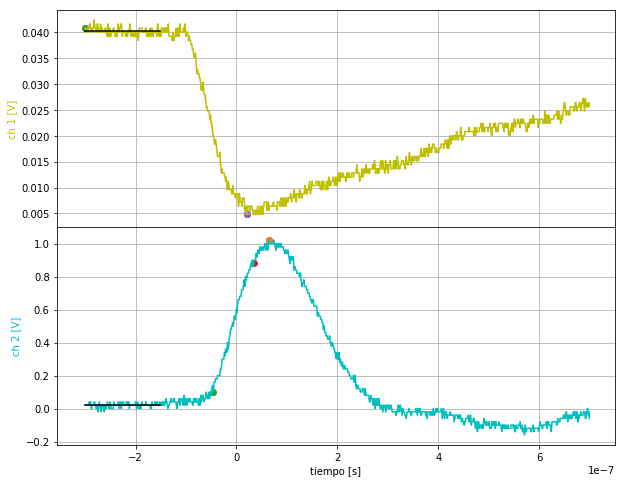

In [24]:
[izqFWHM, derFWHM]= [0,0]
plota3(conv1, T, Meas2, messungenZahl, prop, bMeas2, maxIx, ixTau, izqFWHM, derFWHM)

In [13]:
[areaTotalAMC, areaSubidaAMC, maxAMC] = [areaTotalAMCi, areaSubidaAMCi, maxAMCi] 
areaPulser=0
maxPulser=0
areaPulser, maxPulser, areaSubidaAMC, areaTotalAMC, maxAMC= conversionV2(conv1, T, areaPulser, maxPulser, areaSubidaAMC, areaTotalAMC, maxAMC)
areaPulser, maxPulser, areaSubidaAMC, areaTotalAMC, maxAMC

(0.0,
 0.020800000000000003,
 6.694302564102182e-08,
 1.7021015384614413e-07,
 0.99350000000000005)

In [4]:
npzData.items()

[('settings',
  array({'POLARITY': 'NORMAL', 'STANDARD': 'NTSC', ':CURSOR:VBARS:UNITS': 'SECONDS', ':TRIGGER:MAIN:EDGE:SOURCE': 'CH2', ':MEASUREMENT:METHOD': 'AUTO', 'INKSAVER': 'ON', 'HOLDOFF:VALUE': '5.0E-7', ':HARDCOPY:BUTTON': 'SAVESALL', ':CH1:PROBE': '1.0E0', 'SCALE1': 0.02, 'MAIN:SCALE': '1.0E-7', 'SELECT:SOURCE': 'CH1', ':MEASUREMENT:IMMED:TYPE': 'PERIOD', 'PERSISTENCE': '0', 'BANDWIDTH': 'OFF', 'SCALE2': 0.5, ':DISPLAY:FORMAT': 'YT', 'STOPAFTER': 'SEQUENCE', ':CURSOR:HBARS:POSITION1': '2.24E-2', 'WIDTH:POLARITY': 'POSITIVE', 'TYPE': 'EDGE', ':MEASUREMENT:MEAS5:TYPE': 'FREQUENCY', 'DATEPRINT': 'DEFLT', ':PICTBRIDGE:PAPERSIZE': 'DEFLT', ':HORIZONTAL:DELAY:SCALE': '5.0E-9', 'SOURCE': 'CH2', ':SAVE:IMAGE:FILEFORMAT': 'EPSIMAGE', 'WIDTH': '1.0E-3', 'SOURCE1': 'CH1', 'COUPLING': 'NOISEREJ', 'CH2': '1', ':HORIZONTAL:VIEW': 'MAIN', 'POSITION1': -1.04, ':SELECT:CH1': '1', ':VERBOSE': '1', ':MEASUREMENT:MEAS1:TYPE': 'CRMS', 'REFB': '0', 'DESTINATION': 'REFA', 'STYLE': 'VECTORS', 'REFA':

In [26]:
prop= 0.15
rechazo= 0.09
tauAMC, areaSubidaAMC, areaTotalAMC, maxAMC= tausAreasMaxSerieAdq(tipo, npzData, prop, rechazo)

/oldhome/vbettachini/documents/cnea/fision/acquisition/analysis/rutAnl170605.py:156: RuntimeWarning: Mean of empty slice.
  maxCh1= (Meas2[0][maxIx[0]- rangoCercano: maxIx[0]+ rangoCercano]).mean()
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [17]:
# tausAreasMaxSerieAdq(tipo, npzData, prop, rechazo):
FLUC= npzData['ch1']
AMC= npzData['ch2']
messungenZahl= AMC.shape
# tiempo
T= npzData['zeit']# 

tauAMC= np.empty([0, 1])
areaSubidaAMC= np.empty([0, 1])
areaTotalAMC= np.empty([0, 1])
maxAMC= np.empty([0, 1])

conv1= parametrosConversion(npzData)
    
i=0
q=0
cucho= (messungenZahl[0]- q )
# cucho= (messungenZahl[0]- q- 1 )
while (i< cucho ): # recorre cada forma de onda en medición npzData
    # print('Adqusición actual= ', int(i))
    Meas2= np.array([FLUC[i+q], AMC[i+q] ] )
    if (tipo=='pul'):
        anchoPulseri, areaPulseri, maxPulseri, tauAMCi, areaTotalAMCi, areaSubidaAMCi, maxAMCi= tauCeti4(tipo, T, Meas2, messungenZahl, prop, conv1, rechazo)
    else:
        # print('killroy was here'+ ' {:04n} '.format(i)+ 'times' )
        tauAMCi, areaTotalAMCi, areaSubidaAMCi, maxAMCi= tauCeti4(tipo, T, Meas2, messungenZahl, prop, conv1, rechazo)
    # print('{:04n}'.format(i))
    # print (tauAMCi, areaTotalAMCi, areaSubidaAMCi, maxAMCi)
    if (tauAMCi!=0):
        i+=1
        if (tipo=='pul'):
            anchoPulser= np.append(anchoPulser, anchoPulseri)
            areaPulser= np.append(areaPulser, areaPulseri)
            maxPulser= np.append(maxPulser, maxPulseri)
        tauAMC= np.append(tauAMC, tauAMCi)
        areaSubidaAMC= np.append(areaSubidaAMC, areaSubidaAMCi)
        areaTotalAMC= np.append(areaTotalAMC, areaTotalAMCi)
        maxAMC= np.append(maxAMC, maxAMCi)
    else:
        # print('pasa tausAreasMaxSerieAdq')
        q+=1
    cucho= (messungenZahl[0]- q )
    # cucho= (messungenZahl[0]- q- 1 )
        
# conversión área/máximo -> volts*s/volts
if (tipo=='pul'):
    areaPulser, maxPulser, areaSubidaAMC, areaTotalAMC, maxAMC= conversionV2(conv1, T, areaPulser, maxPulser, areaSubidaAMC, areaTotalAMC, maxAMC)
    salida= anchoPulser, areaPulser, maxPulser, tauAMC, areaSubidaAMC, areaTotalAMC, maxAMC
else:
    areaPulser=0
    maxPulser=0
    areaPulser, maxPulser, areaSubidaAMC, areaTotalAMC, maxAMC= conversionV2(conv1, T, areaPulser, maxPulser, areaSubidaAMC, areaTotalAMC, maxAMC)
    salida= tauAMC, areaSubidaAMC, areaTotalAMC, maxAMC

/oldhome/vbettachini/documents/cnea/fision/acquisition/analysis/rutAnl170605.py:156: RuntimeWarning: Mean of empty slice.
  maxCh1= (Meas2[0][maxIx[0]- rangoCercano: maxIx[0]+ rangoCercano]).mean()
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
plt.plot(T,AMC[1])
plt.plot(T,AMC[2])
plt.plot(T,AMC[3])
plt.plot(T,AMC[4])


In [ ]:
!ls

## Solo $Ar$

In [ ]:
# `acq150617z06.npy.npz`
tipo= 'acq'
anne= 15
mes= 6
dia= 17
rango= np.arange(6,7)
prop= 0.2
rechazo= 0.15
tausAMC, areasTotalAMC, areasSubidaAMC, maximosAMC= agregador2(tipo, anne, mes, dia, rango, prop, rechazo)

In [ ]:
enmascaradaPorSobre= 0.2
mascara, tausAMCComprimidos = binner(tausAMC, enmascaradaPorSobre)
anchosPulser=1 # compatibilidad pulAnl160224
areasPulser=1 # compatibilidad pulAnl160224
maximosPulser=1  # compatibilidad pulAnl160224
mezclaOptima= todoEnmascarado3(tipo, mascara, anchosPulser, areasPulser, maximosPulser, tausAMCComprimidos, areasTotalAMC, areasSubidaAMC, maximosAMC)

## Mezcla óptima: $1,5\% N_2$

In [ ]:
# `acq150615z02.npy.npz`
tipo= 'acq'
anne= 15
mes= 6
dia= 15
rango= np.arange(2,3)
prop= 0.2
rechazo= 0.15
tausAMC, areasTotalAMC, areasSubidaAMC, maximosAMC= agregador2(tipo, anne, mes, dia, rango, prop, rechazo)

In [ ]:
enmascaradaPorSobre= 0.1
mascara, tausAMCComprimidos = binner(tausAMC, enmascaradaPorSobre)
anchosPulser=1 # compatibilidad pulAnl160224
areasPulser=1 # compatibilidad pulAnl160224
maximosPulser=1  # compatibilidad pulAnl160224
mezclaOptima= todoEnmascarado3(tipo, mascara, anchosPulser, areasPulser, maximosPulser, tausAMCComprimidos, areasTotalAMC, areasSubidaAMC, maximosAMC)